In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# The set of images
Images = sorted(glob("../../GardenPictures/burst/*"))
Start = 3

In [3]:
img1 = cv2.imread(Images[Start])
img2 = cv2.imread(Images[Start+1])

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

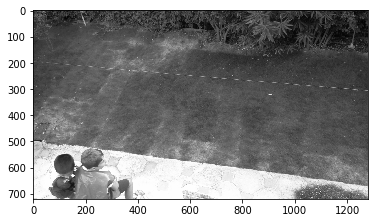

In [4]:
plt.imshow(img1, cmap='gray')

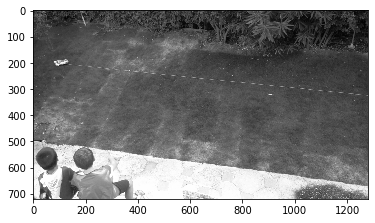

In [5]:
plt.imshow(img2, cmap='gray')

Create a mask such as the bottom disappear:

x=0, y>500
x=w, y>650

==> y = ax + b with a=150/w and b=500

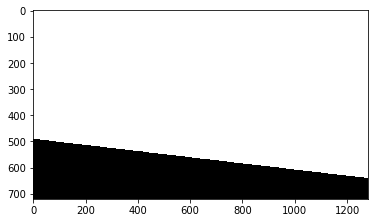

In [6]:
# Create a mask
h, w = img1.shape
mask = np.zeros((h, w), np.uint8)
mask = cv2.bitwise_not(mask)

for y in range(h):
    for x in range(w):
        if y > x*150/w + 490:
            mask[y][x] = 0
        
plt.imshow(mask, cmap='gray')

In [7]:
# Apply mask
img1 = cv2.bitwise_and(img1, mask)
img2 = cv2.bitwise_and(img2, mask)

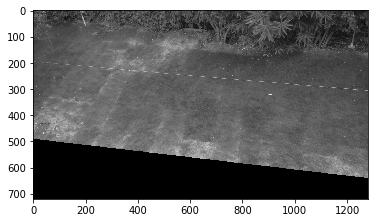

In [8]:
plt.imshow(img1, cmap='gray')

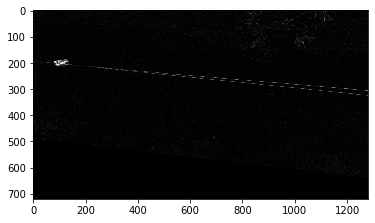

In [9]:
# Compute diff of both images
img = cv2.absdiff(img1, img2)
plt.imshow(img, cmap='gray')

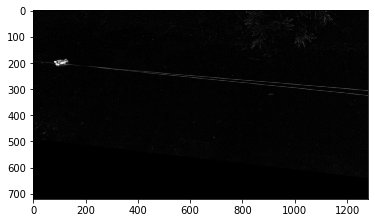

In [10]:
# Apply gaussian blur
img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img, cmap='gray')

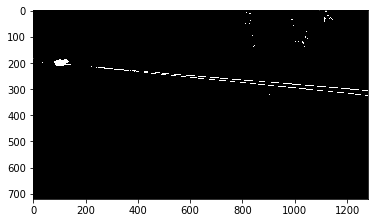

In [11]:
# Threshold
ret, img = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray')

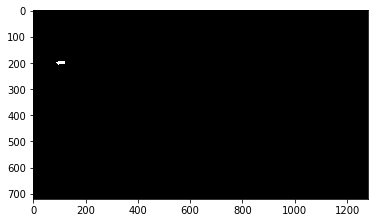

In [12]:
# Eroding
img = cv2.erode(img, np.ones((3, 3), np.uint8), iterations=5)
plt.imshow(img, cmap='gray')

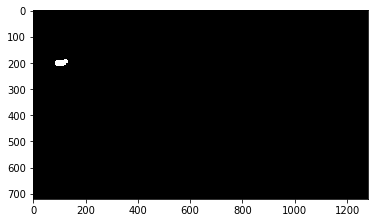

In [13]:
# Dilating
img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations=5)
plt.imshow(img, cmap='gray')

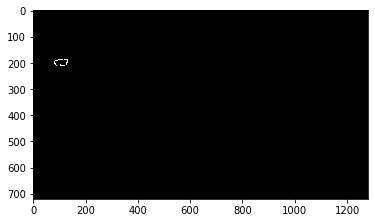

In [14]:
# Display contour
h, w = img1.shape
dark = np.zeros((h, w, 3), np.uint8)
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(dark, contours, -1, (255, 255, 255), 2)
plt.imshow(dark, cmap='gray')

In [15]:
len(contours)

1

In [16]:
x, y, dx, dy = cv2.boundingRect(contours[0])
cv2.rectangle(img2, (x, y), (x+dx, y+dy), (255, 255, 255), 4)
print(f"dx={dx} px\ndy={dy} px\nsize={dx*dy} px*px")

dx=49 px
dy=26 px
size=1274 px*px


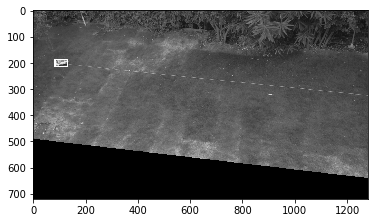

In [17]:
plt.imshow(img2, cmap='gray')

In [18]:
def detect(img1, img2):
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)
    # grey the picture
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # Apply mask
    img1 = cv2.bitwise_and(img1, mask)
    img2 = cv2.bitwise_and(img2, mask)
    # Diff of both images
    img = cv2.absdiff(img1, img2)
    # Apply gaussian blur
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Threshold
    ret, img = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)
    # Eroding
    img = cv2.erode(img, np.ones((3, 3), np.uint8), iterations=5)
    # Dilating
    img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations=5)
    # Find contours
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    found_cat, found_bigger = False, False
    for contour in contours:
        x, y, dx, dy = cv2.boundingRect(contour)
        print(f"x={x}, y={y}, dx={dx}, dy={dy}")
        cv2.rectangle(img2, (x, y), (x+dx, y+dy), (255, 255, 255), 4)
        if 20 < dx < 80 and 20 < dy < 70:
            found_cat = True
        if 80 < dx or 70 < dy:
            found_bigger = True
    return (found_cat and not found_bigger, img2)


In [21]:
i1, i2 = 0, 1

The following can be executed several times, it moves from one couple of pictures to the next one.

Detection: False


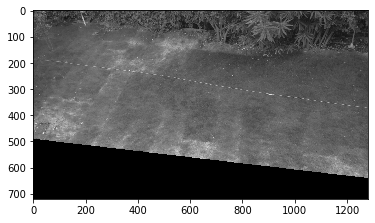

In [20]:
status, img = detect(Images[i1], Images[i2])
i1, i2 = i1+1, i2+1
print(f"Detection: {status}")
plt.imshow(img, cmap='gray')